In [1]:
import os
import pandas as pd

In [53]:
dat_dir = 'C:\\Users\\solharsh\\Desktop\\Data Science\\Machine Learning\\Jigsaw\\Decision Trees\\Data\\Data\\'

In [14]:
df = pd.read_csv('C:\\Users\\solharsh\\Desktop\\Data Science\\Machine Learning\\Jigsaw\\Decision Trees\\Data\\Data\\credit_history.csv')

In [15]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [17]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [19]:
df.describe()

,default,amount,years,income,age
count,7727.000000,7727.000000,7448.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.086332,6.337197e+04,27.542125
std,0.499568,6298.595800,6.700758,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,1.200000e+06,94.000000


In [20]:
df.fillna(4,inplace=True)

In [21]:
df.describe()

,default,amount,years,income,age
count,7727.000000,7727.000000,7727.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.011000,6.337197e+04,27.542125
std,0.499568,6298.595800,6.590163,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,1.200000e+06,94.000000


In [24]:
X=df.drop("default",axis=1)

In [25]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [26]:
Y = df['default']

In [27]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [28]:
X = pd.get_dummies(X)

In [29]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [30]:
import sklearn.model_selection as model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=200)

In [33]:
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.6274256144890039

In [34]:
import sklearn.metrics as metrics
metrics.roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])

0.6721250820352787

In [65]:
import pydotplus

In [66]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir = ('C:\\Users\\solharsh\\Desktop\\Data Science\\Machine Learning\\Jigsaw\\Decision Trees\\Data\\Data\\')

In [67]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [68]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [69]:
from IPython.display import Image

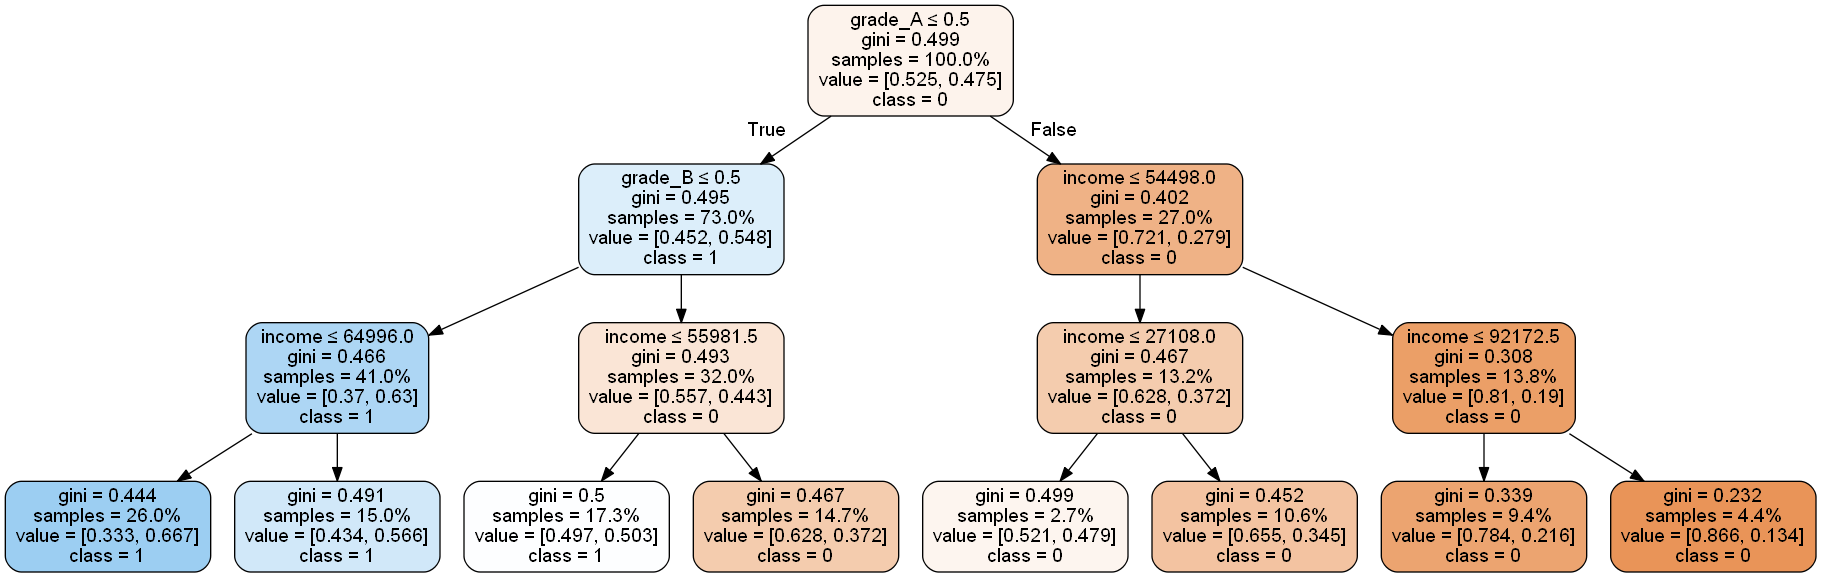

In [70]:
Image(graph.create_png())

### Grid Search-Cross Validation

In [71]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [73]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,Y_train)

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [74]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [75]:
mod.best_score_

0.6314512214851966